## Exercise 7

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Generate synthetic X/y data
mul1 = np.array([5,10])
mul2 = np.array([10,5])
sigma = np.array([[8,0],[0,8]])
X1 = np.random.multivariate_normal(mul1, sigma, 100)
X2 = np.random.multivariate_normal(mul2, sigma, 100)
X = np.concatenate((np.ones((200,1)),np.concatenate((X1,X2),0)),1)
y = np.concatenate((np.zeros((100,1)), np.ones((100,1))),0)

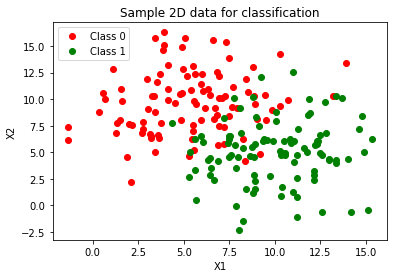

In [63]:
plt.plot(X1[:,0],X1[:,1],'ro', label='Class 0')
plt.plot(X2[:,0],X2[:,1],'go', label='Class 1')
plt.title('Sample 2D data for classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [64]:
theta = np.zeros((3,1))
alpha = 0.00001

def sigmoid(z):
    return 1.0/(1 + np.exp(z))

def crossentropy(theta, X,y,alpha):
    yhat = sigmoid(-X @ theta)
    cost = - (y * np.log(yhat) + (1- y ) * np.log(1-yhat)).mean()
    grad_cost = X.T @ (yhat - y)
    return cost, grad_cost

for epoch in range(10000):
    cost, grad_cost = crossentropy(theta,X,y,alpha)
    if epoch % 1000 == 0:
        print('Epoch %d: cost %f' % (epoch, cost))
    theta = theta - alpha * grad_cost

Epoch 0: cost 0.693147
Epoch 1000: cost 0.264852
Epoch 2000: cost 0.254069
Epoch 3000: cost 0.251736
Epoch 4000: cost 0.251043
Epoch 5000: cost 0.250806
Epoch 6000: cost 0.250718
Epoch 7000: cost 0.250683
Epoch 8000: cost 0.250666
Epoch 9000: cost 0.250657


In [ ]:
# Find two points on the line theta^T@X =0

In [65]:
print(theta)

[[-0.03355726]
 [ 0.68791774]
 [-0.71477132]]


Given optimal $\theta$, we can interpret the vector as defining a line
$$\theta_1 x_1+\theta_2 x_2+\theta_0=0$$
To find any point, given $x_1$, use $x_2 = (-\theta_1 x_1 - \theta_0) / \theta_2$.

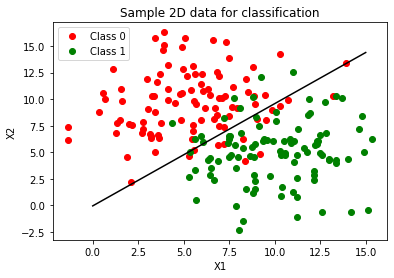

In [66]:
x11 = 0
x12 = 15
x21 = (- theta[1,0] * x11 - theta[0,0]) / theta[2,0]
x22 = (- theta[1,0] * x12 - theta[0,0]) / theta[2,0]
plt.plot(X1[:,0],X1[:,1],'ro', label='Class 0')
plt.plot(X2[:,0],X2[:,1],'go', label='Class 1')
plt.plot((x11, x12),(x21, x22),'k-')
plt.title('Sample 2D data for classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [67]:
def h(X, theta):
    yhat = sigmod(-X @ theta)
    preds = np.where(yhat >= 0.5, 1,0)
    return preds

preds = h(X, theta)
accuracy = (preds == y).sum()/y.shape[0]
print('Training set accuracy = %f' % accuracy)

Training set accuracy = 0.885000


In [68]:
accuracy 

0.885